# **Exploratory Data Analysis**

## *Imports*

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

## Dataset da Repartição da Produção 

### Importação e Visualização

In [92]:
df = pd.read_csv("../data/raw/ReparticaoProducao.csv", encoding='utf-8', sep=';', skiprows=2)

print(df.head())

           Data e Hora  Hídrica  Eólica  Solar  Biomassa  Ondas  \
0  2010-01-01 00:00:00   3209.3  2202.2    0.0     211.2    0.0   
1  2010-01-01 00:15:00   3212.6  2163.9    0.0     208.6    0.0   
2  2010-01-01 00:30:00   3139.7  2219.6    0.0     204.4    0.0   
3  2010-01-01 00:45:00   3101.9  2206.1    0.0     205.7    0.0   
4  2010-01-01 01:00:00   3262.5  2160.2    0.0     205.6    0.0   

   Gás Natural - Ciclo Combinado  Gás natural - Cogeração  Carvão  \
0                          569.6                    371.9   218.8   
1                          606.4                    351.6   218.0   
2                          596.8                    348.7   220.8   
3                          573.6                    349.0   267.6   
4                          558.0                    348.9   348.0   

   Outra Térmica  Importação  Exportação  Bombagem  Injeção de Baterias  \
0           75.1         0.0      1185.0     115.3                  0.0   
1           40.2         0.0    

### Estatísticas Descritivas

In [93]:
print(df.describe())

             Hídrica         Eólica          Solar       Biomassa     Ondas  \
count  537308.000000  537308.000000  537308.000000  537308.000000  537308.0   
mean     1490.205055    1363.639870     160.609415     323.770179       0.0   
std      1285.905984    1030.876205     341.442002      45.019314       0.0   
min         0.000000       0.000000       0.000000      70.900000       0.0   
25%       466.600000     524.700000       0.000000     294.700000       0.0   
50%      1116.600000    1102.000000       1.100000     319.900000       0.0   
75%      2223.900000    1998.300000     166.600000     349.900000       0.0   
max      7278.700000    5077.800000    2823.700000     454.400000       0.0   

       Gás Natural - Ciclo Combinado  Gás natural - Cogeração         Carvão  \
count                  537308.000000            537308.000000  537308.000000   
mean                      953.507576               436.758800     806.744764   
std                       842.779023            

### Valores Ausentes

In [94]:
missing_values = df.isna().sum()

print(missing_values[missing_values > 0])

Series([], dtype: int64)


Não existem valores ausentes

### Categorizar Variáveis

In [95]:
categorical_vars = []
continuous_vars = []
discrete_vars = []

for column in df.columns:
    if df[column].dtype == 'object': 
        categorical_vars.append(column)
    elif df[column].dtype in ['float64', 'int64']: 
        if df[column].nunique() > 20:  
            continuous_vars.append(column)
        else:  
            discrete_vars.append(column)


print("Variáveis Categóricas:", categorical_vars)
print("Variáveis Contínuas:", continuous_vars)
print("Variáveis Discretas:", discrete_vars)

Variáveis Categóricas: ['Data e Hora']
Variáveis Contínuas: ['Hídrica', 'Eólica', 'Solar', 'Biomassa', 'Gás Natural - Ciclo Combinado', 'Gás natural - Cogeração', 'Carvão', 'Outra Térmica', 'Importação', 'Exportação', 'Bombagem', 'Consumo']
Variáveis Discretas: ['Ondas', 'Injeção de Baterias', 'Consumo Baterias']


### Histogramas

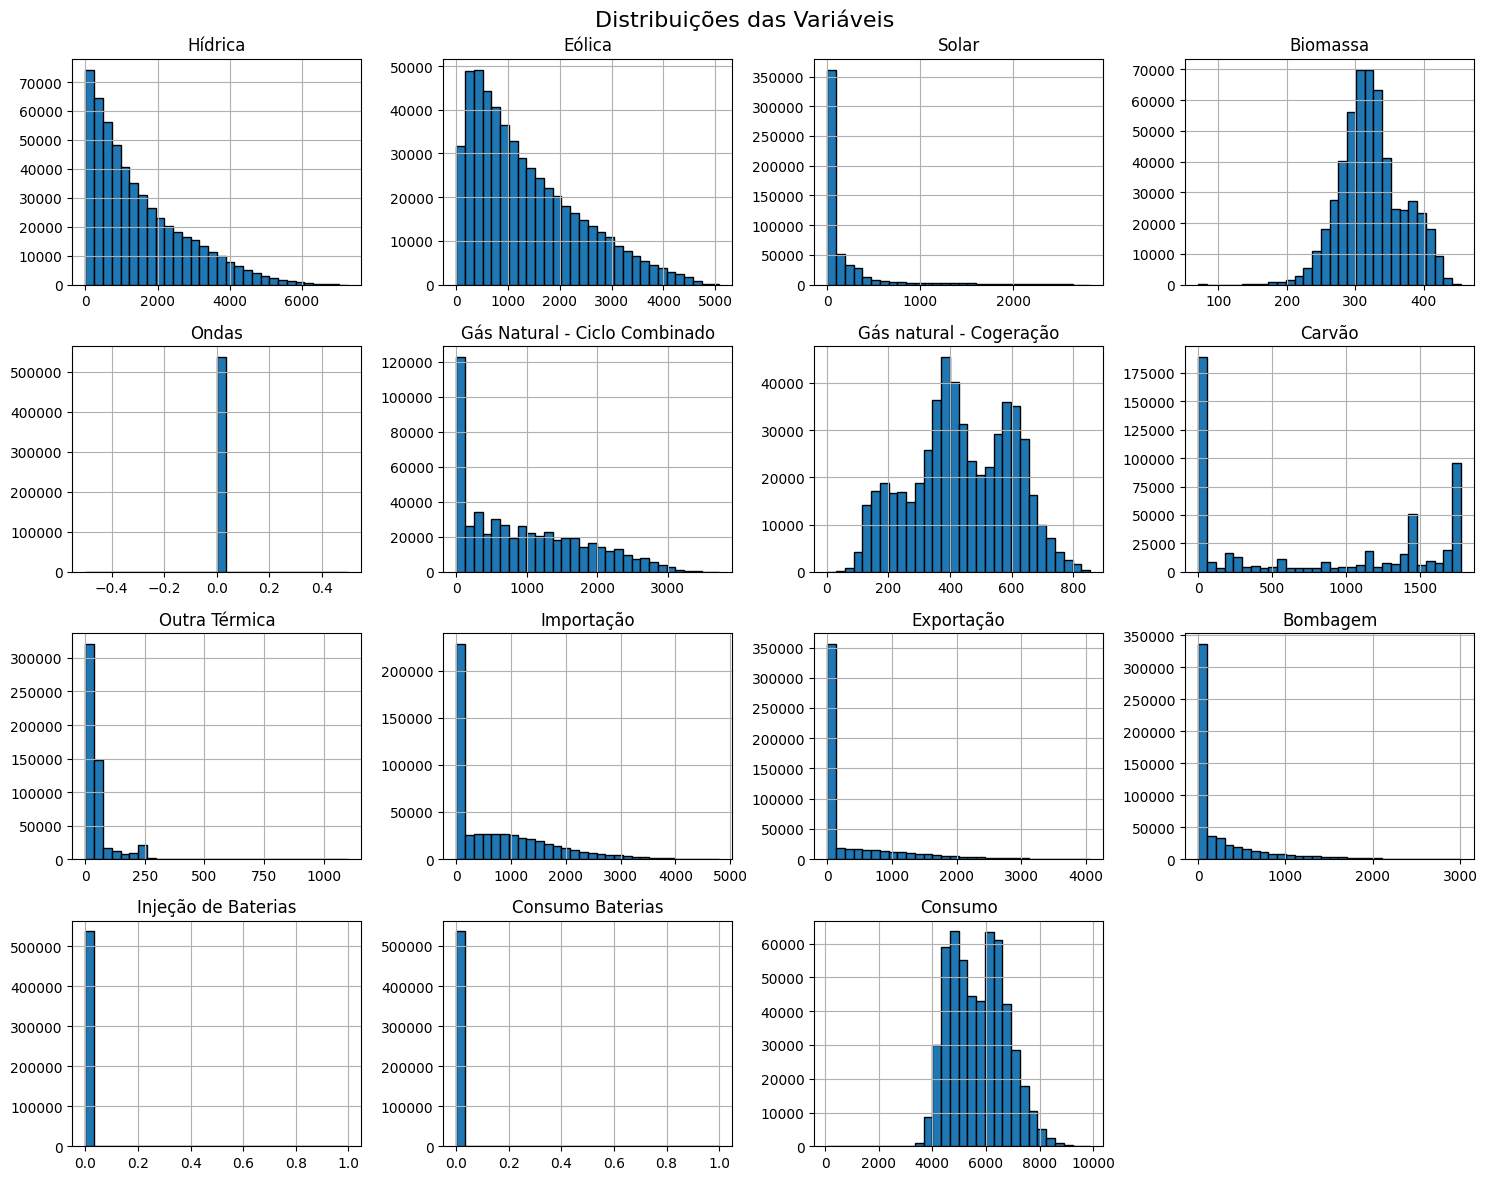

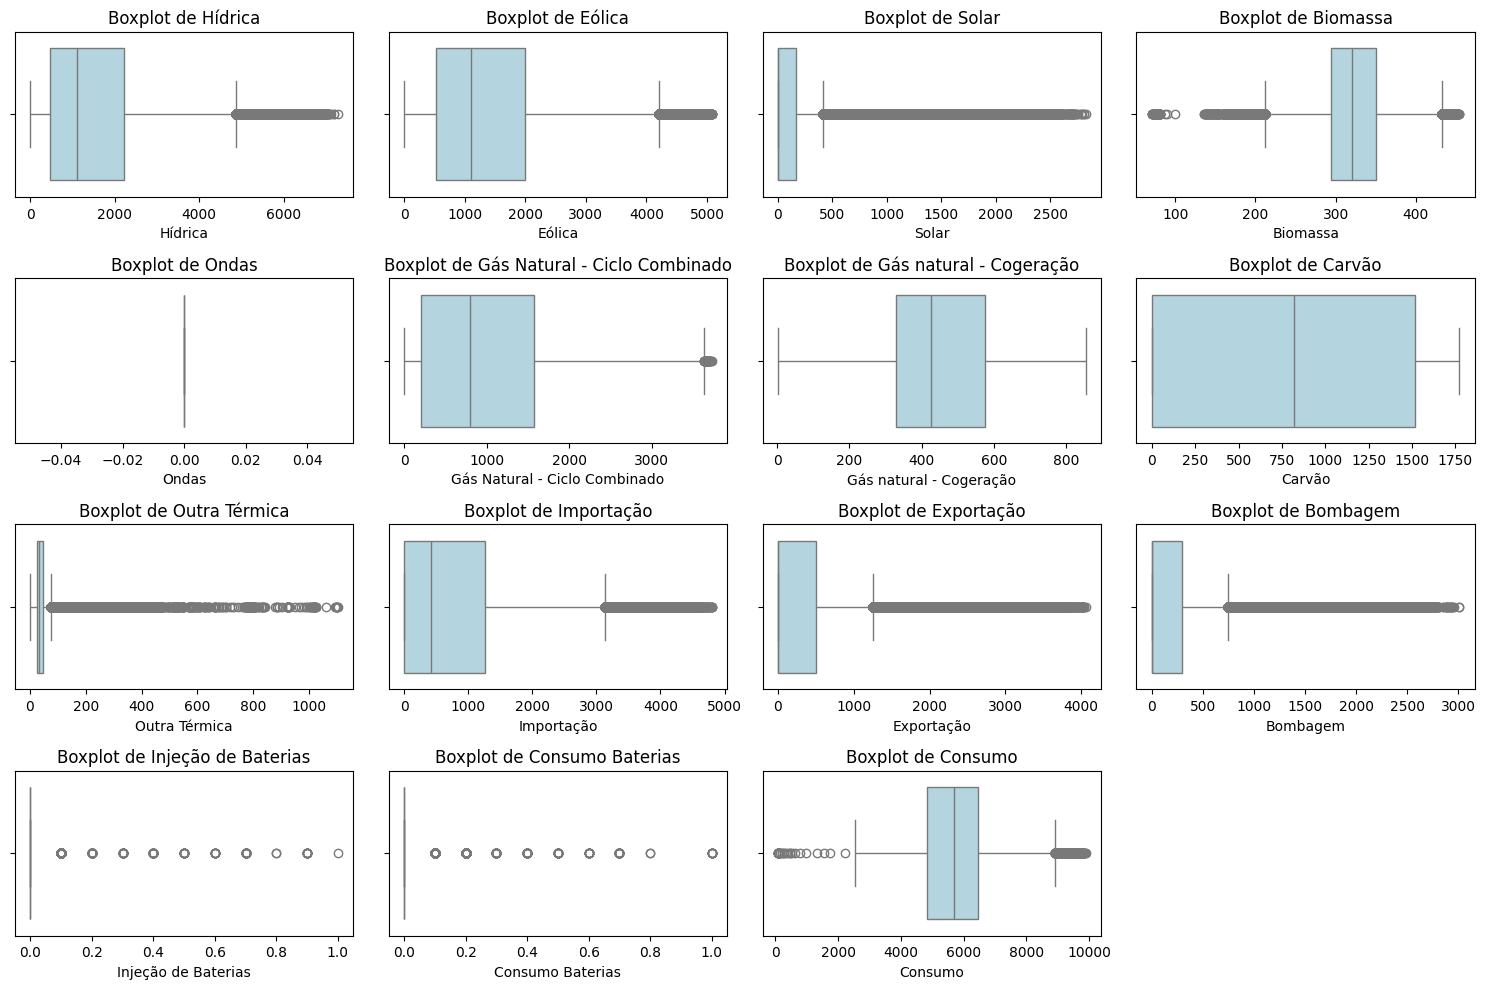

In [96]:
# Remover a coluna "Data e Hora" temporariamente para os gráficos
df_numerical = df.drop(columns=["Data e Hora"])

# Calcular o número de linhas e colunas necessárias para o layout
num_vars = len(df_numerical.columns)
num_cols = 4  # Número fixo de colunas
num_rows = int(np.ceil(num_vars / num_cols))  # Número de linhas necessário

# Plotar histogramas para todas as variáveis numéricas
df_numerical.hist(bins=30, figsize=(15, 3*num_rows), layout=(num_rows, num_cols), edgecolor='black')

# Ajustar título e layout
plt.suptitle("Distribuições das Variáveis", fontsize=16)
plt.tight_layout()
plt.show()

# Plotar boxplots para todas as variáveis numéricas (para verificar outliers)
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_numerical.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(data=df_numerical, x=column, color='lightblue')
    plt.title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

### Distribuições Temporais

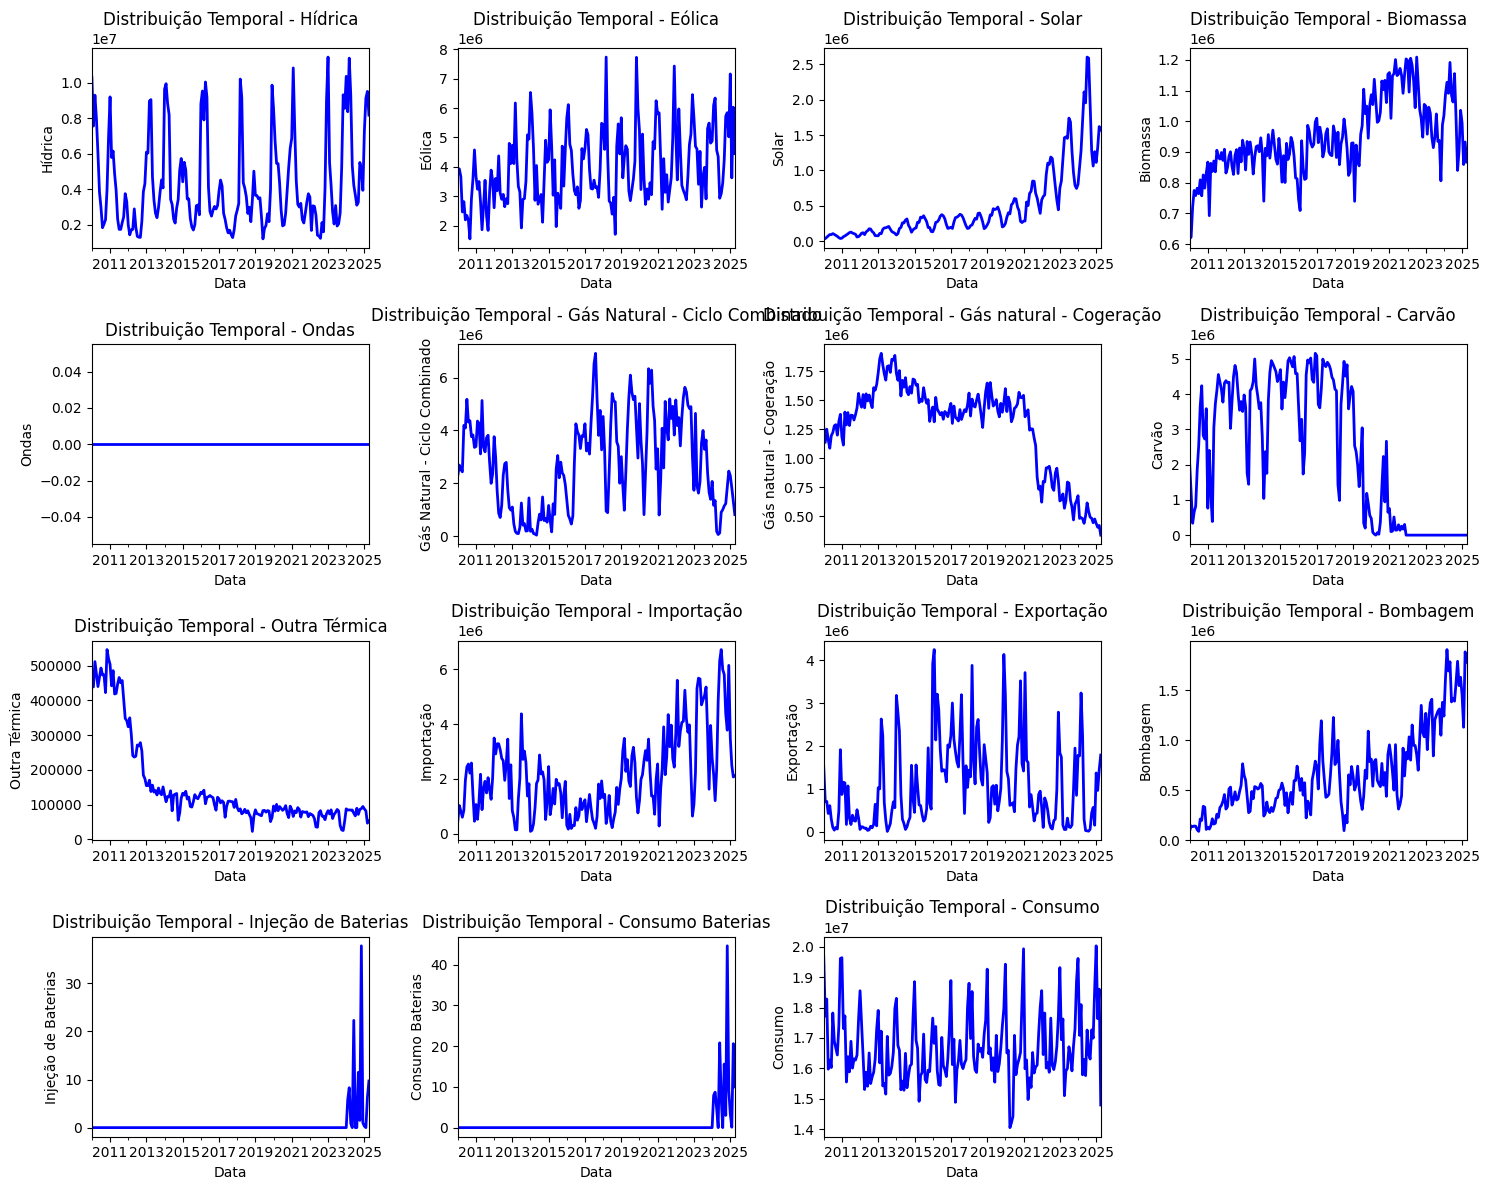

In [101]:
# Converter a coluna "Data e Hora" para o formato datetime
df['Data e Hora'] = pd.to_datetime(df['Data e Hora'], format='%Y-%m-%d %H:%M:%S')

# Remover a coluna "Data e Hora" temporariamente para os gráficos
df_numerical = df.drop(columns=["Data e Hora"])

# Agrupar por mês ou por dia (dependendo de como queremos visualizar as distribuições)
df_monthly = df.resample('ME', on='Data e Hora').sum()  # Agrupar por mês

# Calcular o número de linhas e colunas necessárias para o layout
num_vars = len(df_numerical.columns)
num_cols = 4  # Número fixo de colunas
num_rows = int(np.ceil(num_vars / num_cols))  # Número de linhas necessário

# Visualizar as distribuições temporais para cada variável (mensal)
plt.figure(figsize=(15, 3*num_rows))
for i, column in enumerate(df_numerical.columns):
    plt.subplot(num_rows, num_cols, i+1)
    df_monthly[column].plot(kind='line', color='blue', linewidth=2)
    plt.title(f"Distribuição Temporal - {column}")
    plt.xlabel("Data")
    plt.ylabel(f"{column}")

plt.tight_layout()
plt.show()

### Gráficos de Análise

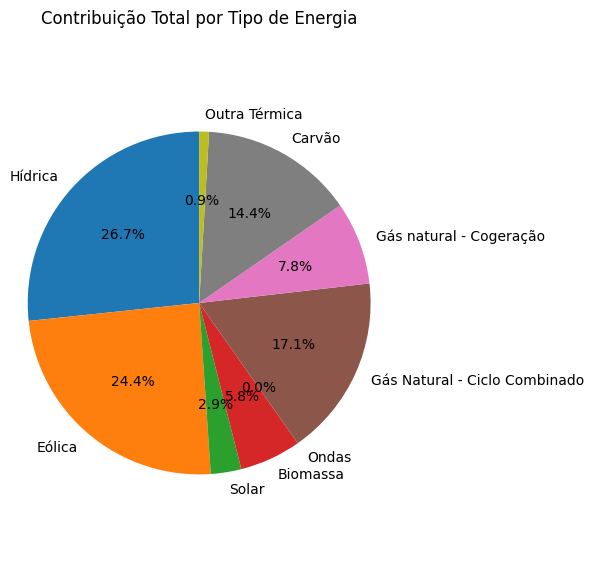

In [102]:
# Colunas das fontes de energia
energia_cols = [
    'Hídrica',
    'Eólica',
    'Solar',
    'Biomassa',
    'Ondas',
    'Gás Natural - Ciclo Combinado',
    'Gás natural - Cogeração',
    'Carvão',
    'Outra Térmica'
]

# Somar os valores de cada fonte
total_por_fonte = df[energia_cols].sum()

# Criar o gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(total_por_fonte, labels=total_por_fonte.index, autopct='%1.1f%%', startangle=90)
plt.title("Contribuição Total por Tipo de Energia")
plt.axis('equal')  # garante que o pie chart seja redondo
plt.tight_layout()
plt.show()

### Matriz de Confusão

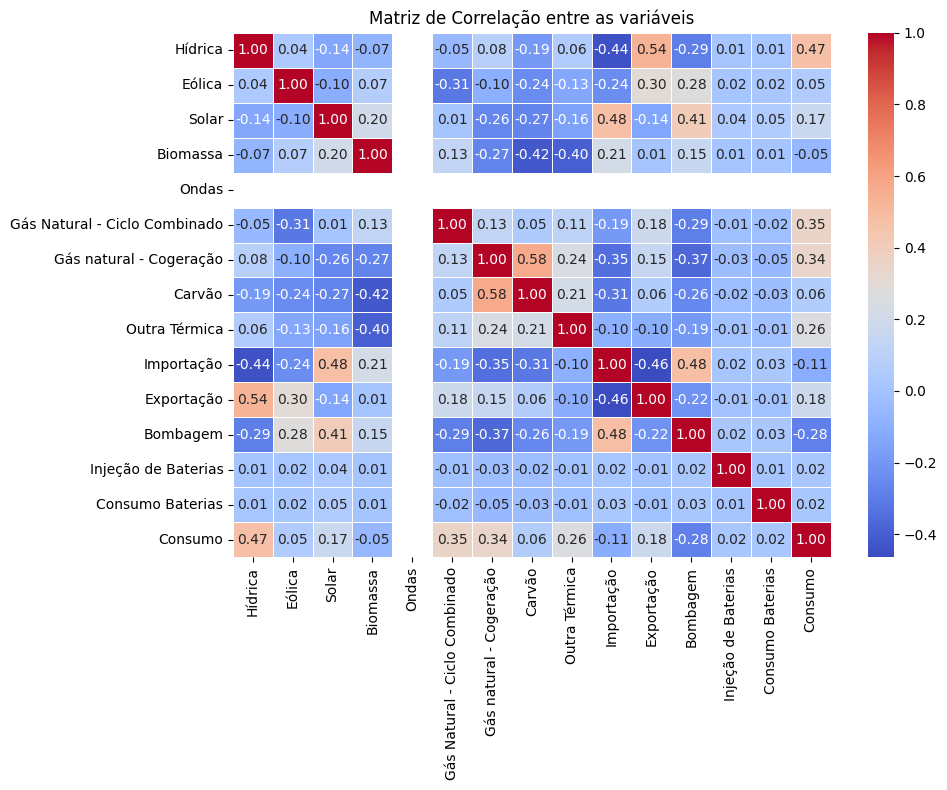

In [103]:
# Gerar a matriz de correlação sem a coluna "Data e Hora"
df_corr = df.drop(columns=["Data e Hora"])  # Remover temporariamente para a correlação
corr_matrix = df_corr.corr()

# Visualizar a matriz de correlação usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação entre as variáveis")
plt.tight_layout()
plt.show()

## Dataset da Intensidade Média do Vento - IPMA 

### Importação e Visualização

In [105]:
df_vento = pd.read_csv("../data/raw/IntensidadeMediaVento10m.csv", sep=';', encoding='utf-8')

print(df_vento.head())


    ANO  MES  DIA  1200551  1210622  1200567  1200575  1200545  1210702  \
0  2013    1    1      1.4      0.5      1.6      3.2      1.9      0.9   
1  2013    1    2      1.6      0.3      1.1      0.6      2.3      1.2   
2  2013    1    3      2.2      1.4      1.5      1.3      2.9      2.6   
3  2013    1    4      2.3      0.3      0.9      0.4      2.9      1.2   
4  2013    1    5      2.5      0.2      0.4      0.4      2.7      0.7   

   1200560  ...  1200548  1200570  1210718  1210734  1200571  1200579  \
0      2.0  ...      1.2      1.6      0.9      1.1      2.6      2.0   
1      4.0  ...      1.8      3.1      0.5      1.2      2.7      1.9   
2      7.4  ...      2.2      3.6      1.3      1.9      4.0      3.5   
3      4.4  ...      1.5      2.4      1.3      2.1      4.1      3.2   
4      1.9  ...      1.5      1.5      0.9      1.6      1.5      2.9   

   1210770  1200558  1200562  1200554  
0      1.5      3.0      3.0      3.1  
1      1.6      2.3      1.6  

In [106]:
df_vento.tail()

,ANO,MES,DIA,1200551,1210622,1200567,1200575,1200545,1210702,1200560,...,1200548,1200570,1210718,1210734,1200571,1200579,1210770,1200558,1200562,1200554
4012,2023,12,27,2.5,-990.0,0.5,-990.0,5.2,3.3,2.6,...,4.0,1.8,3.7,2.0,1.4,3.7,1.0,2.4,2.7,2.5
4013,2023,12,28,2.7,-990.0,0.6,0.8,6.0,3.5,2.3,...,4.9,1.7,3.1,1.8,1.9,2.9,0.7,1.6,2.1,3.4
4014,2023,12,29,1.1,-990.0,0.5,0.9,2.8,2.0,1.4,...,2.6,1.5,2.4,1.6,1.4,2.7,0.6,1.4,2.0,3.1
4015,2023,12,30,2.0,-990.0,2.3,1.7,3.5,2.1,2.6,...,2.9,1.4,1.7,1.3,1.3,2.0,0.8,1.3,2.3,1.9
4016,2023,12,31,2.4,-990.0,2.5,2.9,3.2,2.6,3.7,...,1.8,2.4,1.3,1.1,2.6,1.7,0.7,1.6,2.1,1.7


In [107]:
# 2. Dicionário de códigos para nomes
codigo_para_nome = {
    '1200551': 'Viana do Castelo / Chafé',
    '1210622': 'Braga / Merelim',
    '1200567': 'Vila Real / Aeródromo',
    '1200575': 'Bragança',
    '1200545': 'Porto / Pedras Rubras',
    '1210702': 'Aveiro / Universidade',
    '1200560': 'Viseu / Centro Coordenador',
    '1210683': 'Guarda',
    '1200548': 'Coimbra / Cernache / Aeródromo',
    '1200570': 'Castelo Branco',
    '1210718': 'Leiria',
    '1210734': 'Santarém / Fonte Boa',
    '1200571': 'Portalegre',
    '1200579': 'Lisboa / Gago Coutinho',
    '1210770': 'Setúbal / Estação de Fruticultura',
    '1200558': 'Évora / Aeródromo',
    '1200562': 'Beja',
    '1200554': 'Faro / Aeroporto'
}

# 3. Separar colunas fixas (não renomear) e colunas a renomear
colunas_fixas = ['ANO', 'MES', 'DIA']
colunas_medicoes = df_vento.columns.difference(colunas_fixas, sort=False)

# 4. Criar novo nome de colunas com substituições apenas nos códigos
df_vento.columns = [codigo_para_nome.get(col, col) for col in df_vento.columns]

# Verificar resultado
print(df_vento.columns.tolist())

['ANO', 'MES', 'DIA', 'Viana do Castelo / Chafé', 'Braga / Merelim', 'Vila Real / Aeródromo', 'Bragança', 'Porto / Pedras Rubras', 'Aveiro / Universidade', 'Viseu / Centro Coordenador', 'Guarda', 'Coimbra / Cernache / Aeródromo', 'Castelo Branco', 'Leiria', 'Santarém / Fonte Boa', 'Portalegre', 'Lisboa / Gago Coutinho', 'Setúbal / Estação de Fruticultura', 'Évora / Aeródromo', 'Beja', 'Faro / Aeroporto']


### Estatísticas Descritivas

In [108]:
print(df_vento.describe())

               ANO          MES         DIA  Viana do Castelo / Chafé  \
count  4017.000000  4017.000000  4017.00000               4017.000000   
mean   2018.000000     6.523774    15.72716               -487.126562   
std       3.162199     3.448901     8.80014                496.096677   
min    2013.000000     1.000000     1.00000               -990.000000   
25%    2015.000000     4.000000     8.00000               -990.000000   
50%    2018.000000     7.000000    16.00000                  1.100000   
75%    2021.000000    10.000000    23.00000                  2.100000   
max    2023.000000    12.000000    31.00000                  6.700000   

       Braga / Merelim  Vila Real / Aeródromo     Bragança  \
count      4017.000000            4017.000000  4017.000000   
mean       -374.848743              -1.801344   -11.920463   
std         481.279459              58.454714   117.364252   
min        -990.000000            -990.000000  -990.000000   
25%        -990.000000          

### Valores Ausentes

In [109]:
df_vento.replace(-990, np.nan, inplace=True)
missing_values = df_vento.isna().sum()
print(missing_values[missing_values > 0])

Viana do Castelo / Chafé             1981
Braga / Merelim                      1525
Vila Real / Aeródromo                  14
Bragança                               57
Porto / Pedras Rubras                 283
Aveiro / Universidade                 663
Viseu / Centro Coordenador             83
Guarda                                190
Coimbra / Cernache / Aeródromo         57
Castelo Branco                          1
Leiria                                191
Santarém / Fonte Boa                   52
Portalegre                            226
Lisboa / Gago Coutinho                 32
Setúbal / Estação de Fruticultura     192
Évora / Aeródromo                      28
Beja                                  471
Faro / Aeroporto                      352
dtype: int64


Tem muitos valores omissos, especialmente nas estações de Viana do Castelo/Chafé e Braga/Merelim. 

### Categorizar Variáveis

In [110]:
categorical_vars_vento = []
continuous_vars_vento = []
discrete_vars_vento = []

for column in df_vento.columns:
    if df_vento[column].dtype == 'object': 
        categorical_vars_vento.append(column)
    elif df_vento[column].dtype in ['float64', 'int64']: 
        if df_vento[column].nunique() > 20:  
            continuous_vars_vento.append(column)
        else:  
            discrete_vars_vento.append(column)


print("Variáveis Categóricas:", categorical_vars_vento)
print("Variáveis Contínuas:", continuous_vars_vento)
print("Variáveis Discretas:", discrete_vars_vento)

Variáveis Categóricas: []
Variáveis Contínuas: ['DIA', 'Viana do Castelo / Chafé', 'Braga / Merelim', 'Vila Real / Aeródromo', 'Bragança', 'Porto / Pedras Rubras', 'Aveiro / Universidade', 'Viseu / Centro Coordenador', 'Guarda', 'Coimbra / Cernache / Aeródromo', 'Castelo Branco', 'Leiria', 'Santarém / Fonte Boa', 'Portalegre', 'Lisboa / Gago Coutinho', 'Setúbal / Estação de Fruticultura', 'Évora / Aeródromo', 'Beja', 'Faro / Aeroporto']
Variáveis Discretas: ['ANO', 'MES']


### Distribuições

#### Histogramas

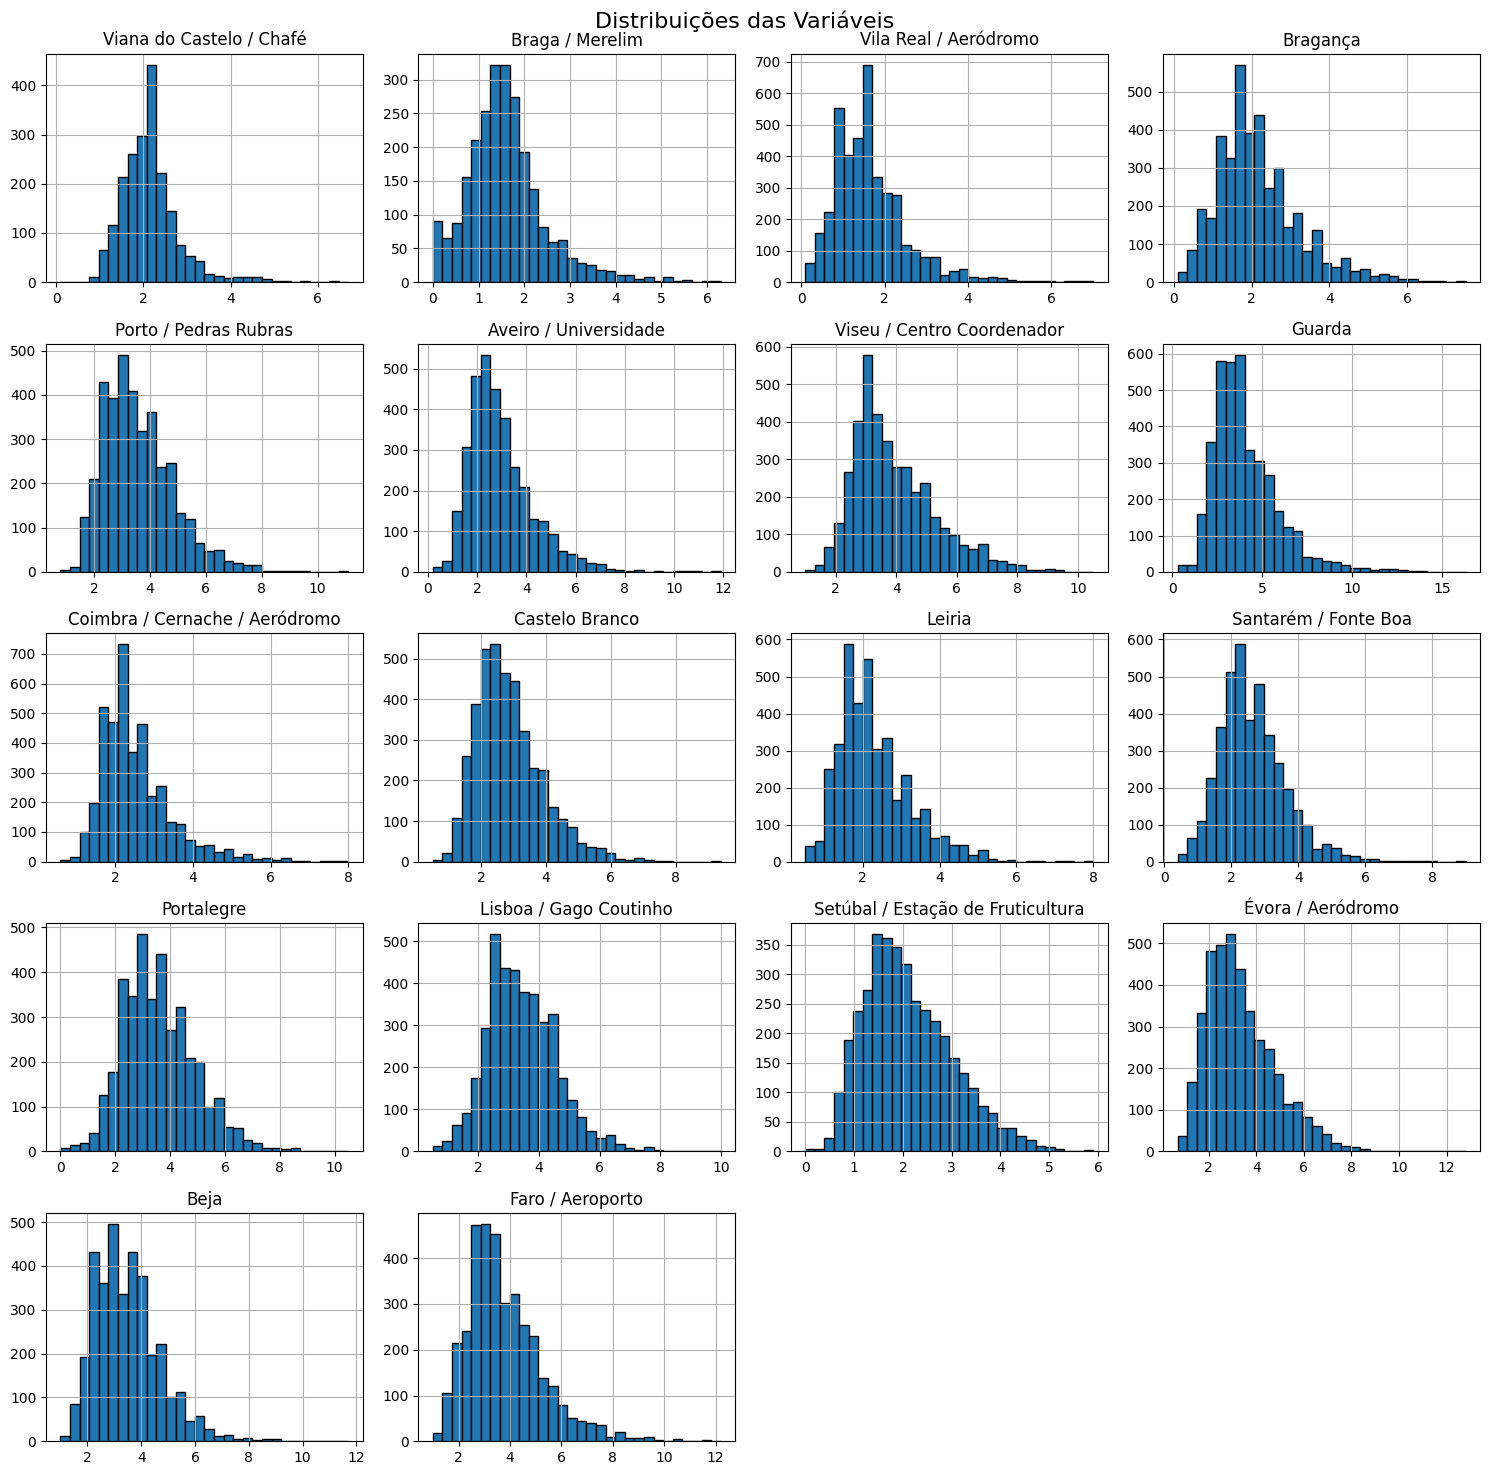

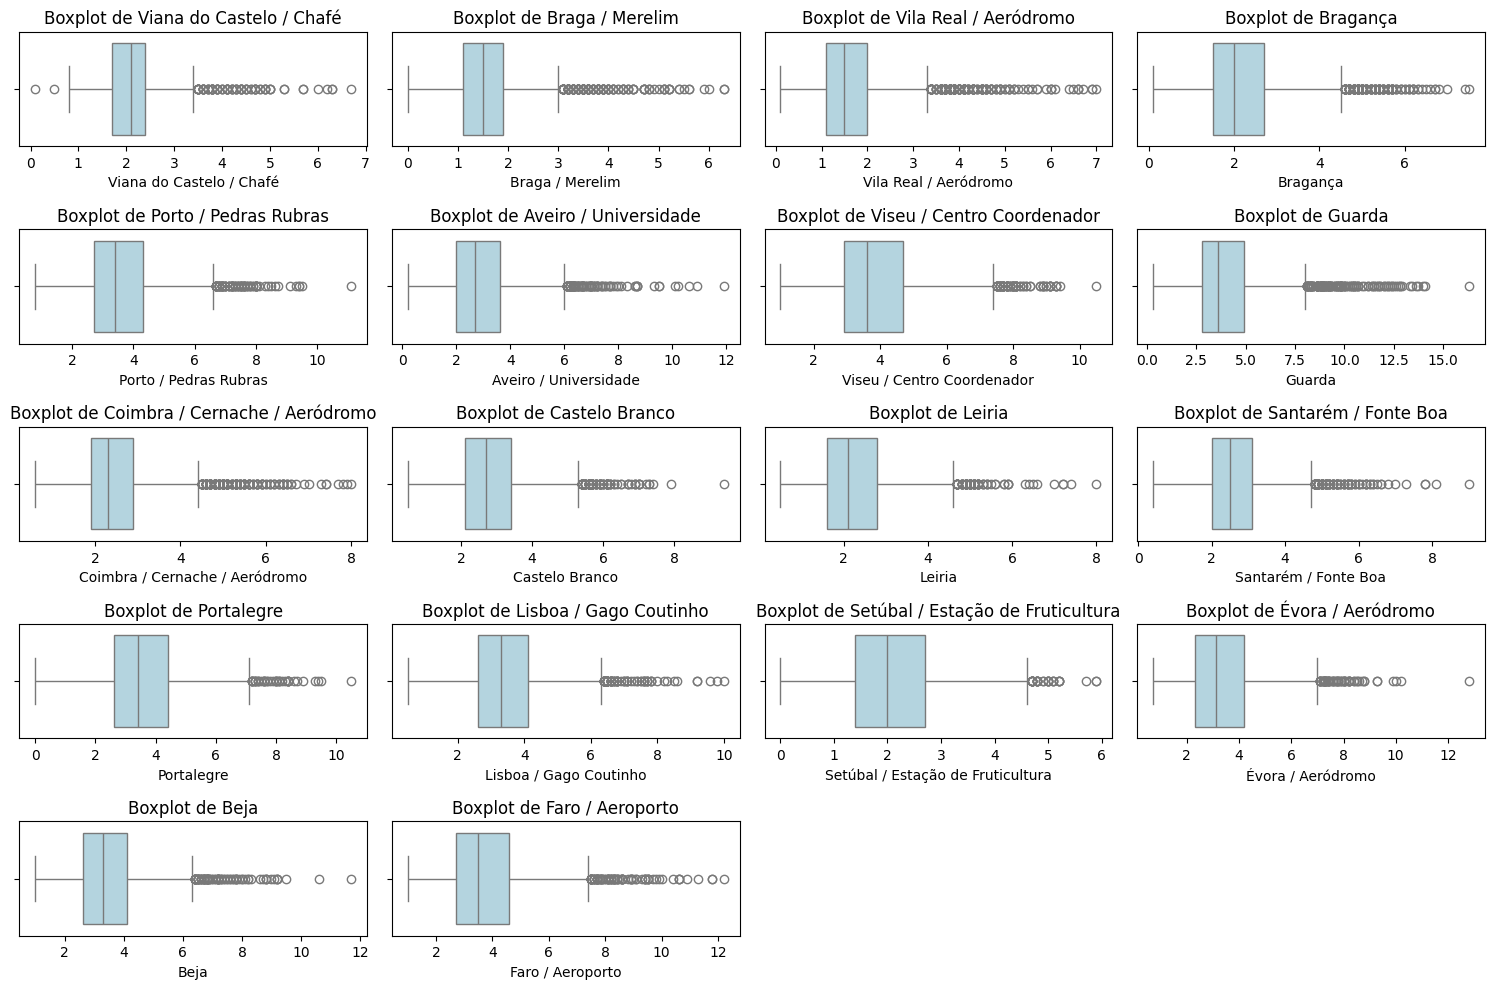

In [112]:
df_numerical_vento = df_vento.drop(columns=["ANO", "MES", "DIA"])

# Calcular o número de linhas e colunas necessárias para o layout
num_vars_vento = len(df_numerical_vento.columns)
num_cols_vento = 4  # Número fixo de colunas
num_rows_vento = int(np.ceil(num_vars_vento / num_cols_vento))  # Número de linhas necessário

df_numerical_vento.hist(
    bins=30,
    figsize=(15, 3*num_rows_vento),
    layout=(num_rows_vento, num_cols_vento),
    edgecolor='black'
)

# Ajustar título e layout
plt.suptitle("Distribuições das Variáveis", fontsize=16)
plt.tight_layout()
plt.show()

# Plotar boxplots para todas as variáveis numéricas (para verificar outliers)
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_numerical_vento.columns):
    plt.subplot(num_rows_vento, num_cols_vento, i+1)
    sns.boxplot(data=df_numerical_vento, x=column, color='lightblue')
    plt.title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()


#### Intensidade do Vento por Distrito

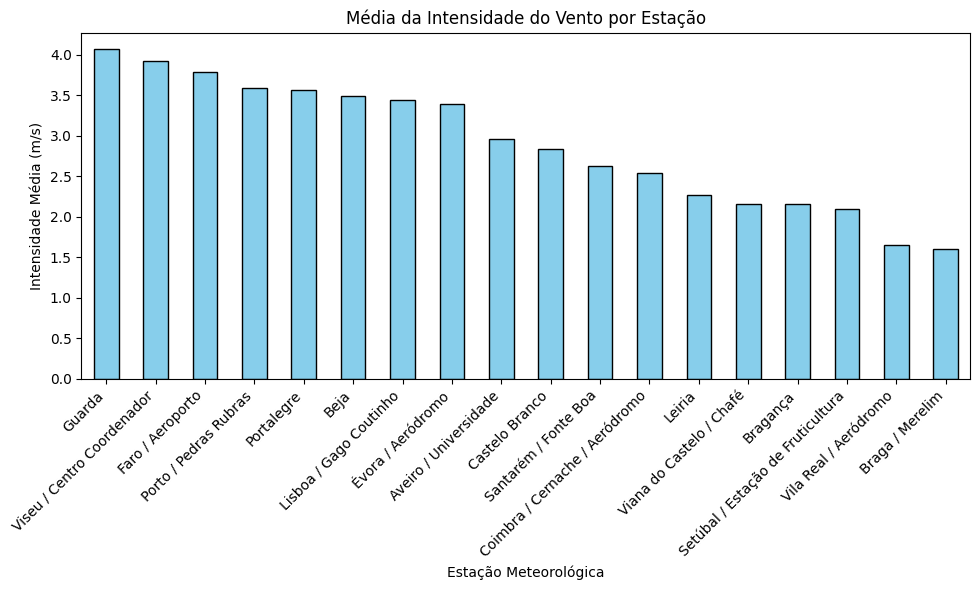

In [113]:
df_vento_estacoes = df_vento.drop(columns=['ANO', 'MES', 'DIA'])

# Calcular a média da intensidade do vento por estação
media_vento = df_vento_estacoes.mean()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
media_vento.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Média da Intensidade do Vento por Estação')
plt.ylabel('Intensidade Média (m/s)')
plt.xlabel('Estação Meteorológica')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Distribuições Temporais

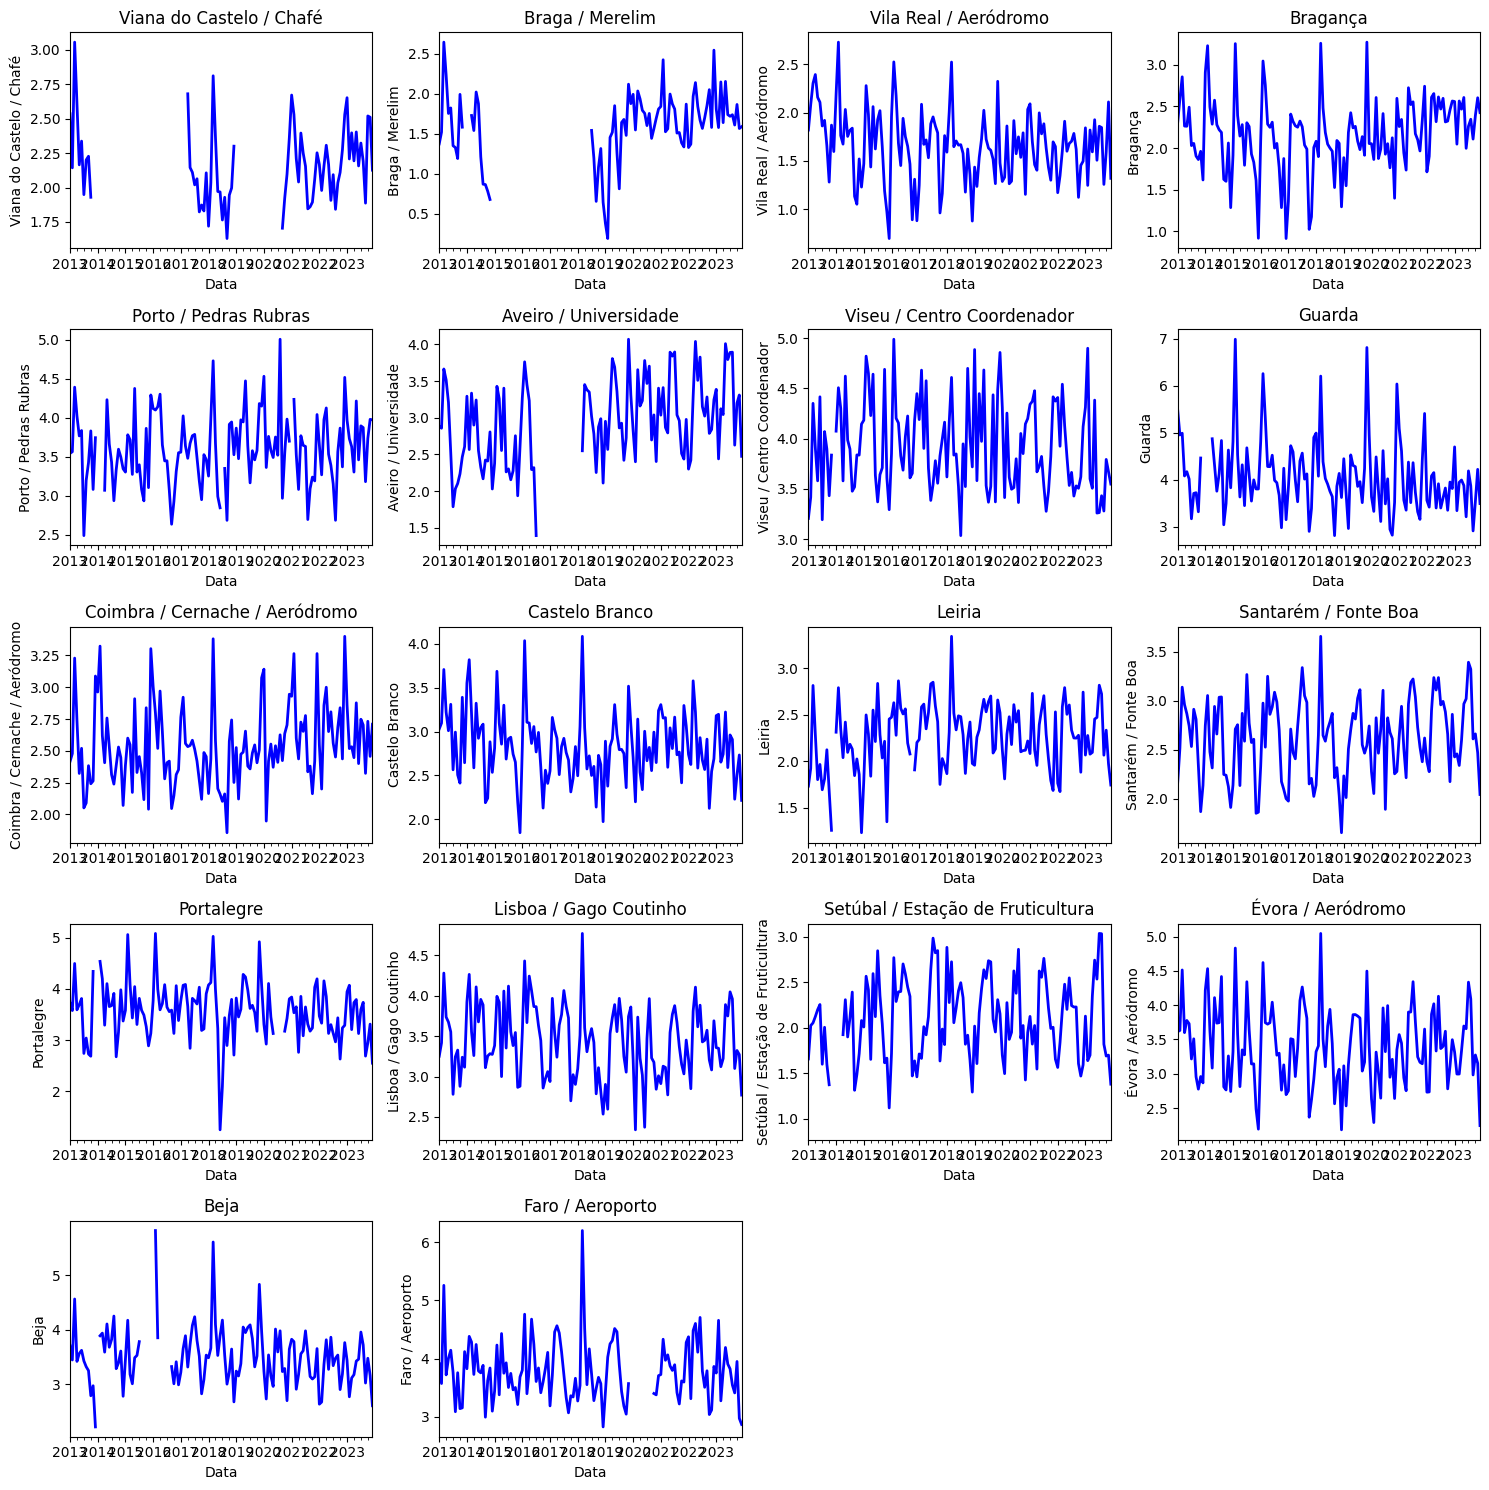

In [114]:
# Copiar apenas as colunas de data e renomear para os nomes esperados
data_cols = df_vento[['ANO', 'MES', 'DIA']].rename(columns={"ANO": "year", "MES": "month", "DIA": "day"})

# Criar a nova coluna de data
df_vento['Data'] = pd.to_datetime(data_cols)

# Agora continua normalmente:
df_numerical_vento = df_vento.drop(columns=["ANO", "MES", "DIA"])

df_monthly_vento = df_numerical_vento.set_index('Data').resample('ME').mean()

num_vars_vento = df_monthly_vento.shape[1]
num_cols_vento = 4
num_rows_vento = int(np.ceil(num_vars_vento / num_cols_vento))

plt.figure(figsize=(15, 3 * num_rows_vento))
for i, column in enumerate(df_monthly_vento.columns):
    plt.subplot(num_rows_vento, num_cols_vento, i + 1)
    df_monthly_vento[column].plot(kind='line', color='blue', linewidth=2)
    plt.title(f"{column}")
    plt.xlabel("Data")
    plt.ylabel(column)

plt.tight_layout()
plt.show()


### Gráficos de Análise

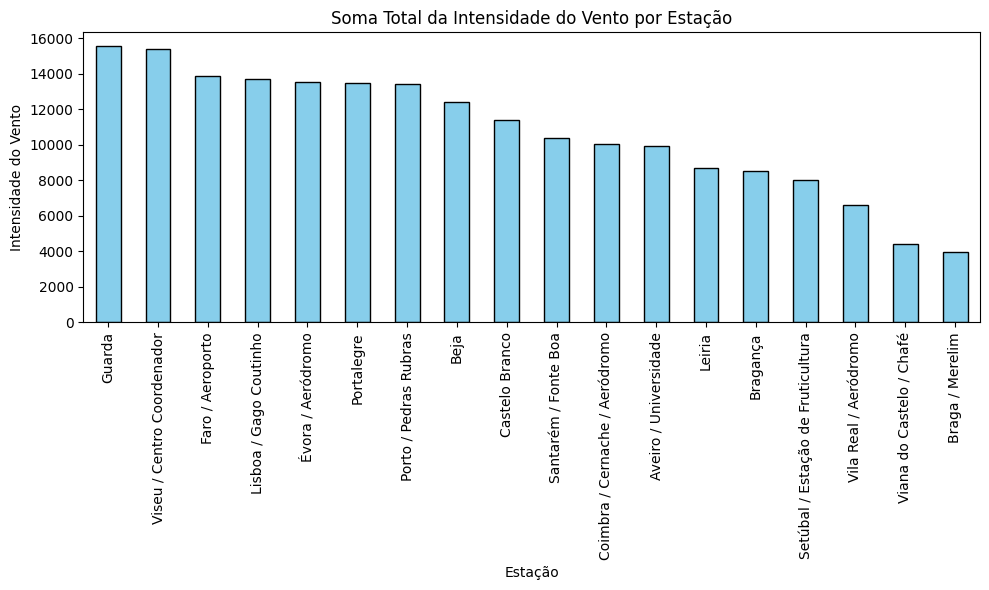

In [115]:
# Somar os valores de cada variável (ignorando NaN)
somas_totais = df_numerical_vento.drop(columns='Data').sum().sort_values(ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
somas_totais.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Soma Total da Intensidade do Vento por Estação", fontsize=12)
plt.ylabel("Intensidade do Vento")
plt.xlabel("Estação")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Matriz de Correlação

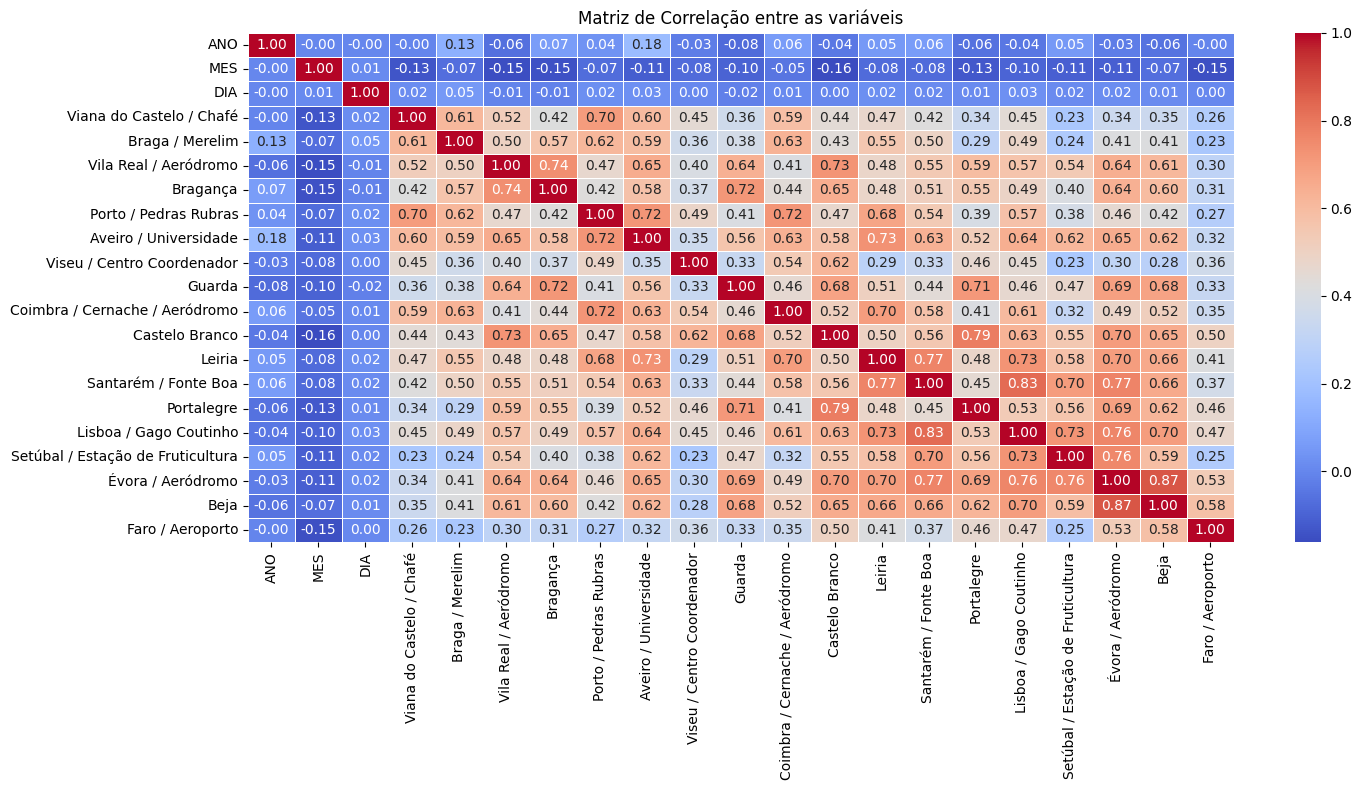

In [116]:
# Gerar a matriz de correlação sem a coluna "Data e Hora"
df_corr = df_vento.drop(columns=["Data"])  # Remover temporariamente para a correlação
corr_matrix = df_corr.corr()

# Visualizar a matriz de correlação usando seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação entre as variáveis")
plt.tight_layout()
plt.show()

## Dataset das Centrais Eólicas

### Importação e Visualização

In [ ]:
# Caminho para o ficheiro
file_path = "../data/raw/CentraisEolicas.csv"

# Ler o CSV ignorando a primeira linha
df_centrais = pd.read_csv(file_path, encoding='utf-8', sep=';')

# Mostrar as primeiras linhas
print(df_centrais.head())


for col in ['Coordenada X (m)', 'Coordenada Y (m)', 'x', 'y']:
    df_centrais[col] = df_centrais[col].str.replace(' ', '', regex=False)
    df_centrais[col] = df_centrais[col].str.replace('\xa0', '', regex=False)  # remove espaço especial
    df_centrais[col] = df_centrais[col].str.replace(',', '.', regex=False)
    df_centrais[col] = df_centrais[col].astype(float)
df_centrais['Processo N.º'] = pd.to_numeric(df_centrais['Processo N.º'], errors='coerce')

  Coordenada X (m) Coordenada Y (m) Processo N.º   Parque Eólico Sub-Parque  \
0        -11 262,8        92 561,85          663  ALTO DE MONÇÃO              
1       -11 055,16        92 737,28          663  ALTO DE MONÇÃO              
2       -10 882,48        92 948,44          663  ALTO DE MONÇÃO              
3       -10 712,35        93 135,28          663  ALTO DE MONÇÃO              
4         -7931,54        95 324,21          663  ALTO DE MONÇÃO              

  Licenciamento  Concelho Distrito  NUT II      Inspire ID  \
0    Licenciado  Mortágua    Viseu  Centro  IDDGEG_CE_1116   
1    Licenciado  Mortágua    Viseu  Centro  IDDGEG_CE_1115   
2    Licenciado  Mortágua    Viseu  Centro  IDDGEG_CE_1114   
3    Licenciado  Mortágua    Viseu  Centro  IDDGEG_CE_1113   
4    Licenciado   Tondela    Viseu  Centro  IDDGEG_CE_1104   

                         Thematic ID            x           y  
0  IDDGEG_InfraestruturasEnergeticas    -11 262,8  92 561,849  
1  IDDGEG_Infraestrutura

### Estatísticas Descritivas

In [ ]:
# Estatísticas descritivas
print("\n Estatísticas descritivas:")
print(df_centrais.describe())


 Estatísticas descritivas:
       Coordenada X (m)  Coordenada Y (m)  Processo N.º             x  \
count        450.000000        450.000000    428.000000     450.00000   
mean       42255.979244      96174.397978    957.579439   42255.97926   
std        43070.734648      21283.650930    353.352165   43070.73487   
min       -58735.470000      64168.270000    417.000000  -58735.47200   
25%        -1884.935000      75571.062500    663.000000   -1884.93725   
50%        62289.950000      97750.725000    825.000000   62289.94800   
75%        79183.367500     108396.445000   1180.000000   79183.36650   
max       106717.940000     131367.650000   1832.000000  106717.94200   

                   y  
count     450.000000  
mean    96174.397971  
std     21283.650816  
min     64168.271000  
25%     75571.058750  
50%     97750.722000  
75%    108396.445250  
max    131367.646000  


### Valores Ausentes

In [ ]:
# Ver o total de valores ausentes por coluna
missing_values = df_centrais.isna().sum()

print(missing_values[missing_values > 0])

Processo N.º     22
Sub-Parque      130
dtype: int64


Existem valores ausentes no sub-parque mas não será muito relevante porque as coordenadas é que são usadas

### Categorizar Variáveis

In [ ]:
categorical_vars_centrais = []
continuous_vars_centrais = []
discrete_vars_centrais = []

for column in df_centrais.columns:
    if df_centrais[column].dtype == 'object': 
        categorical_vars_centrais.append(column)
    elif df_centrais[column].dtype in ['float64', 'int64']: 
        if df_centrais[column].nunique() > 20:  
            continuous_vars_centrais.append(column)
        else:  
            discrete_vars_centrais.append(column)

print("Variáveis Categóricas:", categorical_vars_centrais)
print("Variáveis Contínuas:", continuous_vars_centrais)
print("Variáveis Discretas:", discrete_vars_centrais)


Variáveis Categóricas: ['Parque Eólico', 'Sub-Parque', 'Licenciamento', 'Concelho', 'Distrito', 'NUT II', 'Inspire ID', 'Thematic ID']
Variáveis Contínuas: ['Coordenada X (m)', 'Coordenada Y (m)', 'Processo N.º', 'x', 'y']
Variáveis Discretas: []


### Distribuições

#### Histogramas

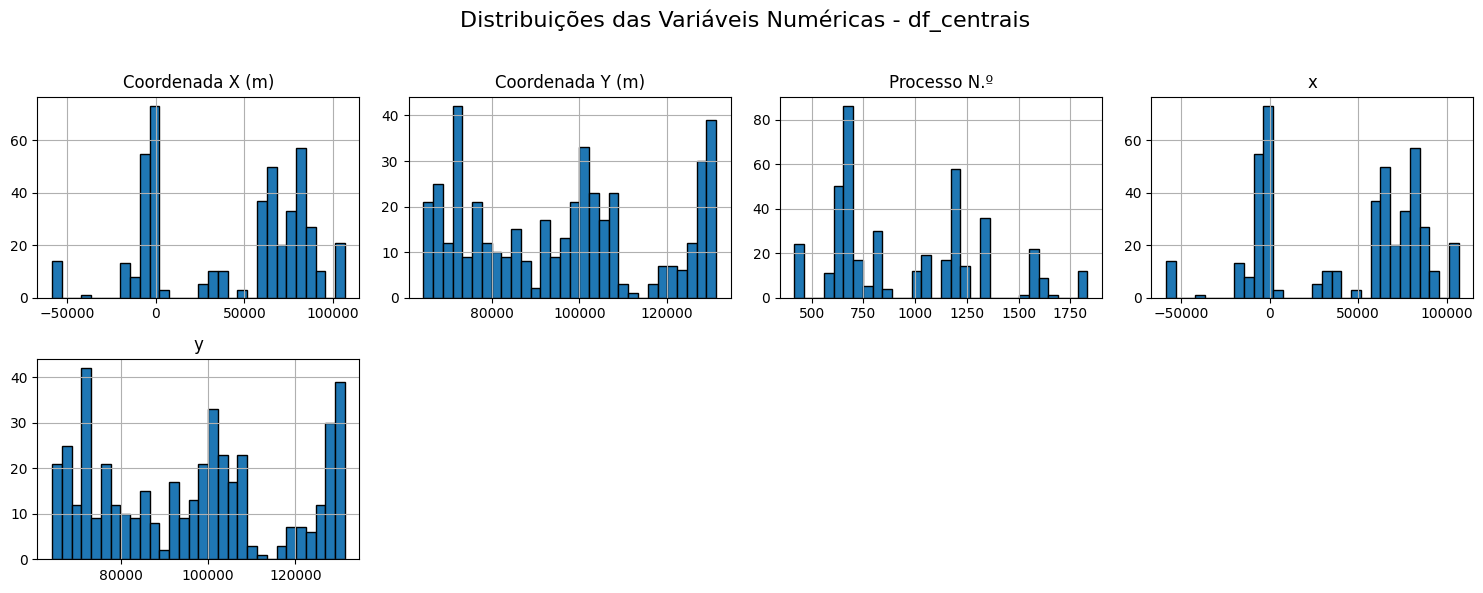

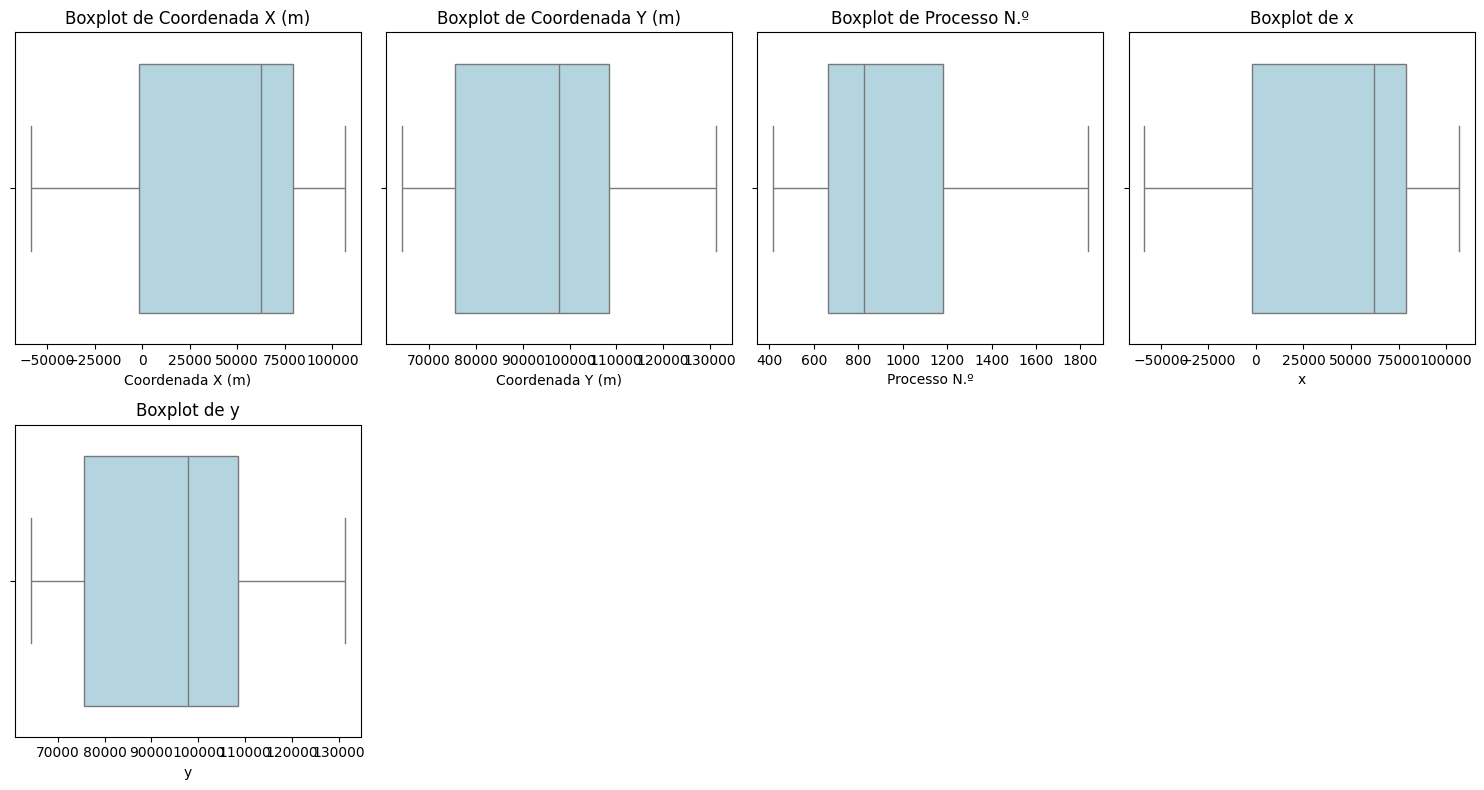

In [ ]:
# Selecionar apenas variáveis numéricas em df_centrais
df_numerical_centrais = df_centrais.select_dtypes(include=['int64', 'float64'])

# Calcular o número de variáveis numéricas
num_vars = len(df_numerical_centrais.columns)
num_cols = 4  # Número fixo de colunas
num_rows = int(np.ceil(num_vars / num_cols))  # Número de linhas necessárias

# Plotar histogramas para todas as variáveis numéricas
df_numerical_centrais.hist(bins=30, figsize=(15, 3*num_rows), layout=(num_rows, num_cols), edgecolor='black')

# Ajustar título e layout
plt.suptitle("Distribuições das Variáveis Numéricas - df_centrais", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Deixar espaço para o título
plt.show()

# Plotar boxplots para todas as variáveis numéricas (para verificar outliers)
plt.figure(figsize=(15, 4*num_rows))
for i, column in enumerate(df_numerical_centrais.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(data=df_numerical_centrais, x=column, color='lightblue')
    plt.title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

#### Geográficas

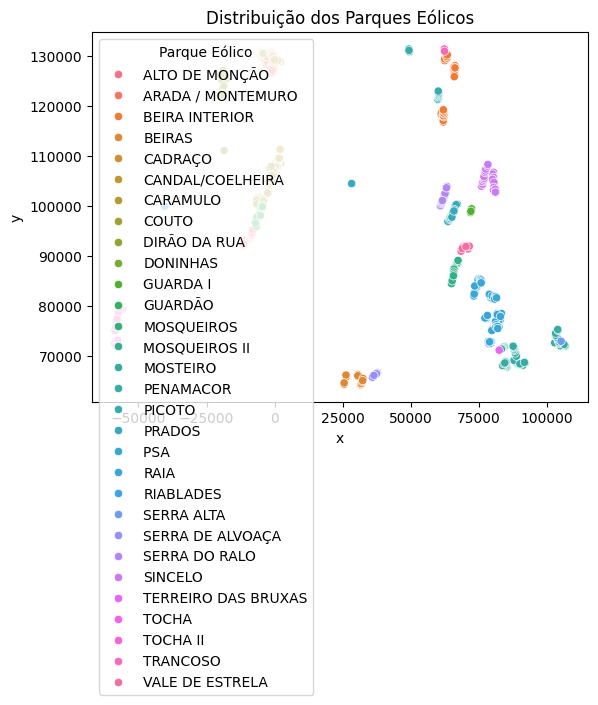

In [ ]:
# Scatter Plot
sns.scatterplot(data=df_centrais, x='x', y='y', hue='Parque Eólico')
plt.title('Distribuição dos Parques Eólicos')
plt.show()


#### Turbinas por Parque Eólico

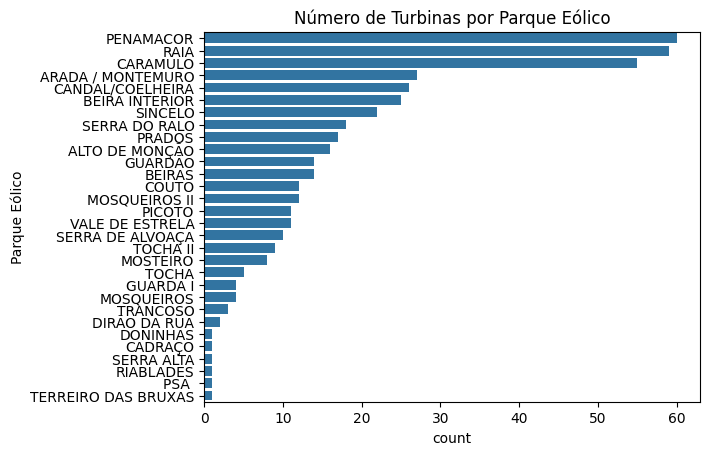

In [ ]:
# Contagem por Parque Eólico
sns.countplot(data=df_centrais, y='Parque Eólico', order=df_centrais['Parque Eólico'].value_counts().index)
plt.title('Número de Turbinas por Parque Eólico')
plt.show()

#### Número de Centrais por Distrito

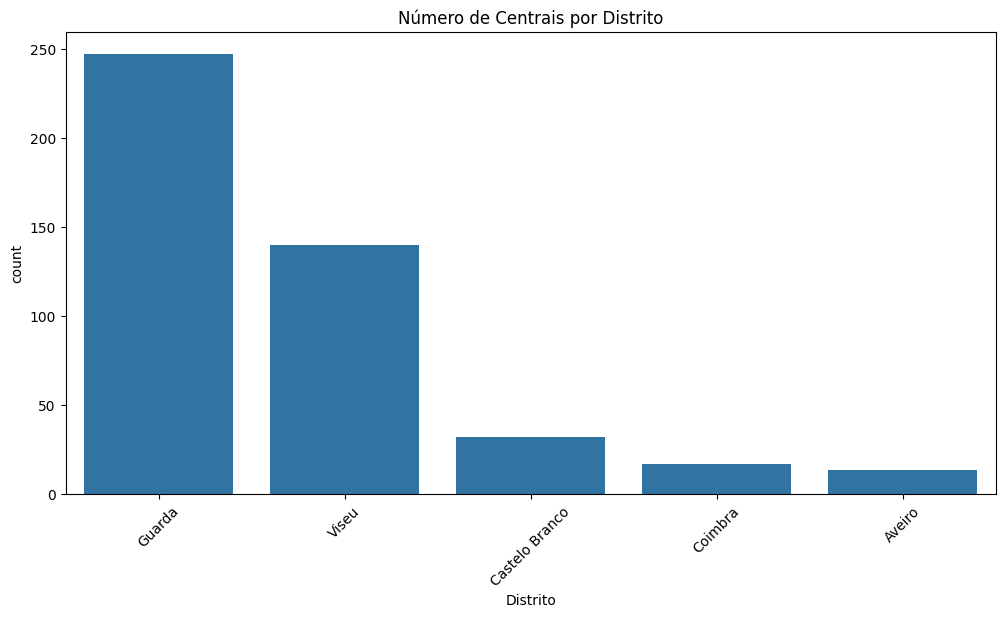

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Distrito', data=df_centrais, order=df_centrais['Distrito'].value_counts().index)
plt.title('Número de Centrais por Distrito')
plt.xticks(rotation=45)
plt.show()


#### Distribuição do Tipo de Licenciamento

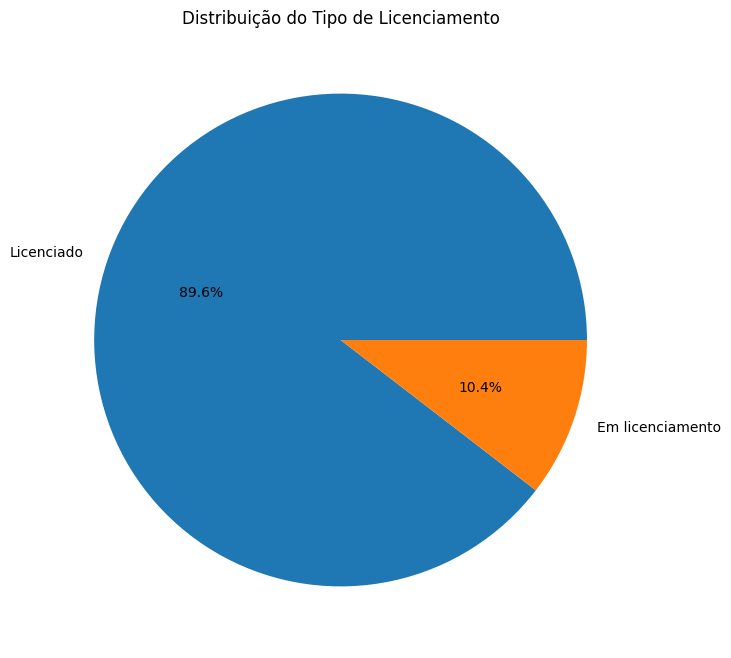

In [ ]:
df_centrais['Licenciamento'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8))
plt.title('Distribuição do Tipo de Licenciamento')
plt.ylabel('')  # tira o label do eixo y
plt.show()


### Matriz de Correlação

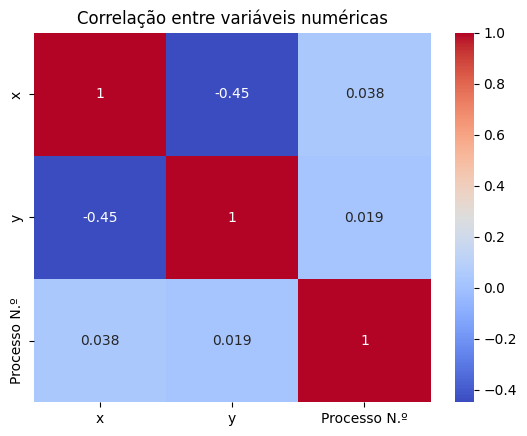

In [ ]:
corr = df_centrais[['x', 'y', 'Processo N.º']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis numéricas')
plt.show()

Todas as variáveis numéricas são independentes umas das outras